<a href="https://colab.research.google.com/github/saurabhkr52/United-Airlines-Customer-Analysis/blob/main/unitedAirlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-> Long average handle time (AHT) affects both efficiency and customer satisfaction. Explore the factors contributing to extended call durations, such as agent performance, call types, and sentiment. Identify key drivers of long AHT and AST, especially during high volume call periods. Additionally, could you quantify the percentage difference between the average handling time for the most frequent and least frequent call reasons?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/merged_calls_data (1).csv')

In [6]:
# Convert datetime columns to actual datetime format for calculation
data['call_start_datetime'] = pd.to_datetime(data['call_start_datetime'], errors='coerce')
data['call_end_datetime'] = pd.to_datetime(data['call_end_datetime'], errors='coerce')

# Calculate Handle Time (in minutes) for each call
data['handle_time'] = (data['call_end_datetime'] - data['call_start_datetime']).dt.total_seconds() / 60

# Group by 'primary_call_reason' to calculate average handle time and call frequency
call_reason_stats = data.groupby('primary_call_reason').agg(
    average_handle_time=('handle_time', 'mean'),
    frequency=('primary_call_reason', 'size')
).sort_values(by='frequency', ascending=False)

# Identify the most and least frequent call reasons and calculate percentage difference in AHT
most_frequent = call_reason_stats.iloc[0]
least_frequent = call_reason_stats.iloc[-1]

# Calculate the percentage difference in average handle time between the most and least frequent call reasons
aht_percentage_difference = ((most_frequent['average_handle_time'] - least_frequent['average_handle_time']) / least_frequent['average_handle_time']) * 100

call_reason_stats, aht_percentage_difference


(                         average_handle_time  frequency
 primary_call_reason                                    
 IRROPS                                  28.6      13057
 Voluntary Change                         NaN      10291
 Seating                                 29.0       6223
 Mileage Plus                             NaN       5487
 Post-Flight                              NaN       3869
 Communications                           NaN       3779
 Products and Services                    NaN       2792
 Upgrade                                 15.0       2682
 Baggage                                  NaN       2616
 Booking                                  NaN       2589
 Checkout                                 NaN       1840
 Check-In                                 NaN       1490
 Voluntary Cancel                         NaN       1304
 Digital Support                          NaN        996
 ETC                                      NaN        930
 Traveler Updates              

->  To visualize the agent sentiment data, we can create a bar plot to show the distribution of sentiment ratings across calls. If average_sentiment is a numeric score, we could use a histogram or box plot to visualize the range and distribution of sentiment values. Here’s sample code using seaborn and matplotlib.

<ipython-input-7-192e56ace9e5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-7-192e56ace9e5>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


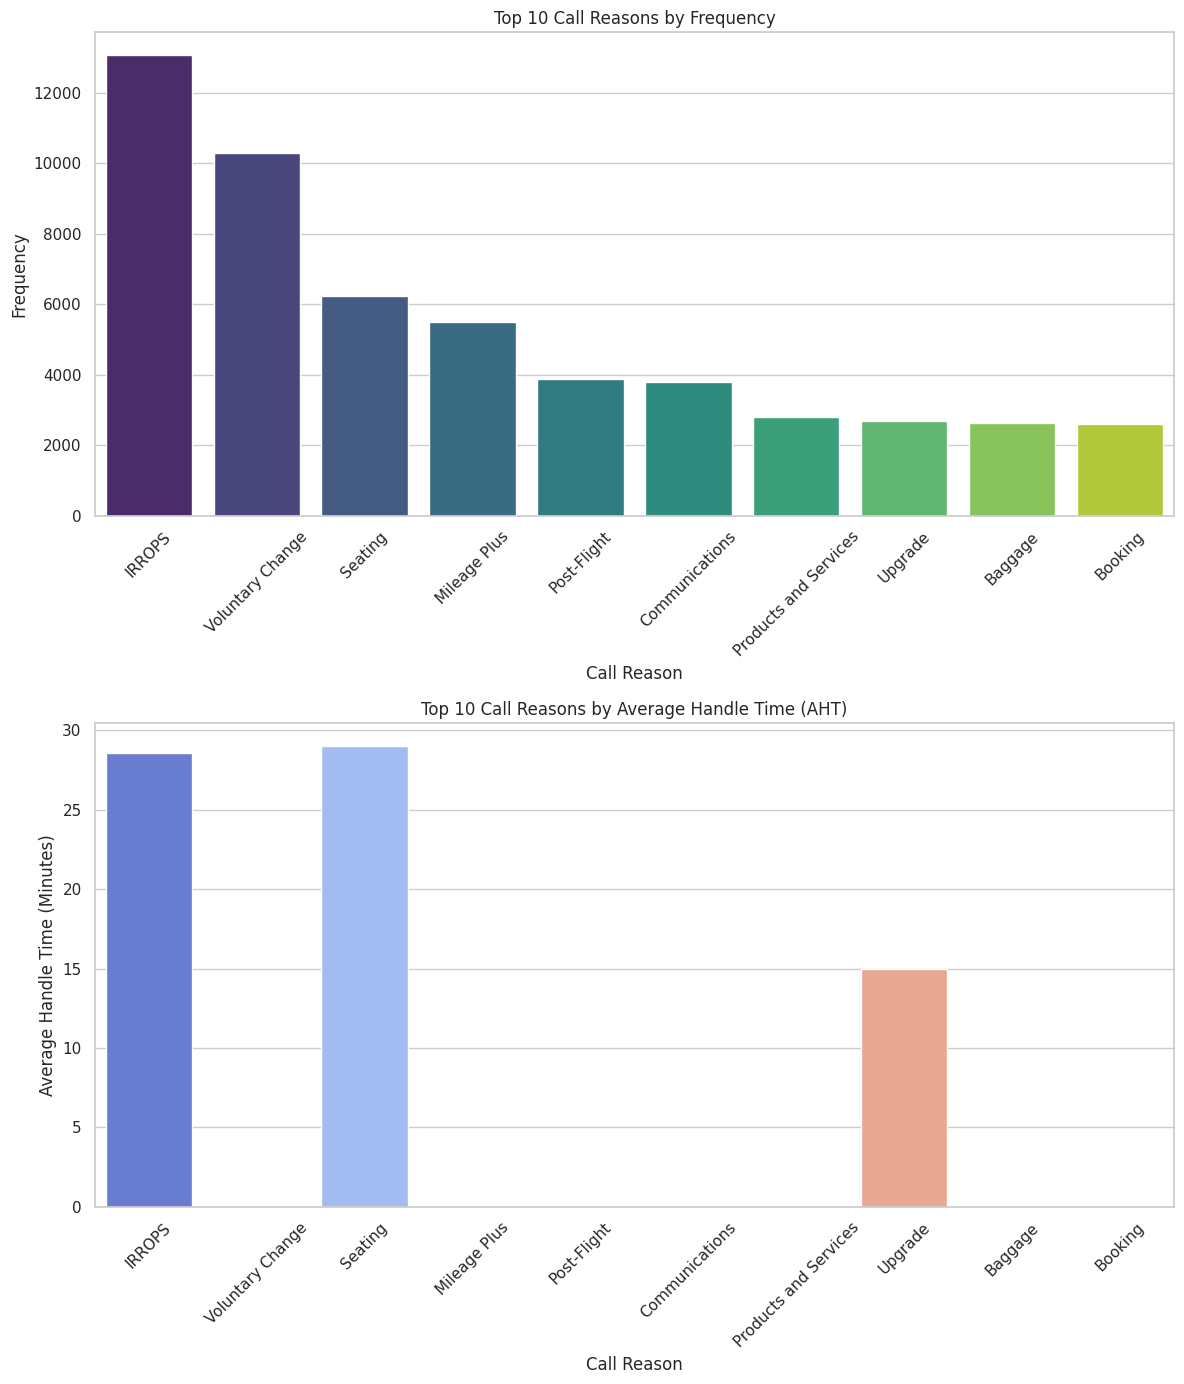

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Sort the data by frequency for better visualization
sorted_call_reason_stats = call_reason_stats.sort_values(by='frequency', ascending=False).head(10)

# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 14))

# Plot 1: Frequency of Top 10 Call Reasons
sns.barplot(
    x=sorted_call_reason_stats.index,
    y=sorted_call_reason_stats['frequency'],
    palette='viridis',
    ax=ax[0]
)
ax[0].set_title('Top 10 Call Reasons by Frequency')
ax[0].set_xlabel('Call Reason')
ax[0].set_ylabel('Frequency')
ax[0].tick_params(axis='x', rotation=45)

# Plot 2: Average Handle Time (AHT) of Top 10 Call Reasons
sns.barplot(
    x=sorted_call_reason_stats.index,
    y=sorted_call_reason_stats['average_handle_time'],
    palette='coolwarm',
    ax=ax[1]
)
ax[1].set_title('Top 10 Call Reasons by Average Handle Time (AHT)')
ax[1].set_xlabel('Call Reason')
ax[1].set_ylabel('Average Handle Time (Minutes)')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


<ipython-input-8-c76571574563>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agent_sentiment_counts.index, y=agent_sentiment_counts.values, palette='viridis')


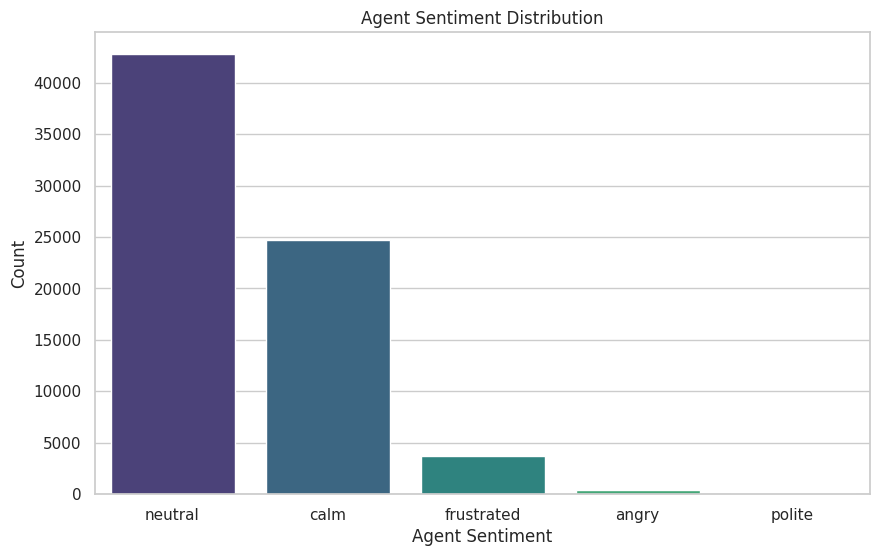

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Convert sentiment data to categorical if it's not numeric (replace 'Positive', 'Neutral', 'Negative' with actual labels if needed)
if data['agent_tone'].dtype == 'object':
    agent_sentiment_counts = data['agent_tone'].value_counts()

    # Bar Plot for Categorical Agent Sentiment
    plt.figure(figsize=(10, 6))
    sns.barplot(x=agent_sentiment_counts.index, y=agent_sentiment_counts.values, palette='viridis')
    plt.title('Agent Sentiment Distribution')
    plt.xlabel('Agent Sentiment')
    plt.ylabel('Count')
    plt.show()

else:
    # If sentiment is numeric, using histogram and boxplot for distribution
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data['agent_tone'], kde=True, bins=20, color="skyblue")
    plt.title('Agent Sentiment Score Distribution')
    plt.xlabel('Sentiment Score')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data['agent_tone'], color="salmon")
    plt.title('Agent Sentiment Score Spread')
    plt.xlabel('Sentiment Score')

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd

# Quick check of the data structure
print(data.head())
print(data.info())


      call_id   customer_id  agent_id call_start_datetime  \
0  4667960400  2033123310.0  963118.0 2024-07-31 23:56:00   
1  1122072124  8186702651.0  519057.0 2024-08-01 00:03:00   
2  6834291559  2416856629.0  158319.0 2024-07-31 23:59:00   
3  2266439882  1154544516.0  488324.0 2024-08-01 00:05:00   
4  1211603231  5214456437.0  721730.0 2024-08-01 00:04:00   

  agent_assigned_datetime   call_end_datetime  \
0           8/1/2024 0:03 2024-08-01 00:34:00   
1           8/1/2024 0:06 2024-08-01 00:18:00   
2           8/1/2024 0:07 2024-08-01 00:26:00   
3           8/1/2024 0:10 2024-08-01 00:17:00   
4           8/1/2024 0:14 2024-08-01 00:23:00   

                                     call_transcript primary_call_reason  \
0  \n\nAgent: Thank you for calling United Airlin...                 NaN   
1  \n\nAgent: Thank you for calling United Airlin...                 NaN   
2  \n\nAgent: Thank you for calling United Airlin...                 NaN   
3  \n\nAgent: Thank you for callin

Second question: Analysis of reasons for calling the agents of united airlines.


In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/content/callsf0d4f5a.csv")

# Function to categorize call transcripts
def categorize_transcript(transcript):
    if any(keyword in transcript.lower() for keyword in ['payment', 'refund', 'charge', 'billing']):
        return 'Billing Issues'
    elif any(keyword in transcript.lower() for keyword in ['reschedule', 'cancel', 'upgrade', 'flight']):
        return 'Flight Changes'
    elif any(keyword in transcript.lower() for keyword in ['login', 'password', 'account', 'profile']):
        return 'Account Issues'
    elif any(keyword in transcript.lower() for keyword in ['error', 'technical', 'support', 'issue']):
        return 'Technical Support'
    else:
        return 'General Inquiry'

# Apply categorization
df['category'] = df['call_transcript'].apply(categorize_transcript)

# Count occurrences per category
category_counts = df['category'].value_counts()
sum_categories = category_counts.sum()

# Display category counts
print(sum_categories)
print(category_counts)

74746
category
Flight Changes       43689
Billing Issues       31043
General Inquiry         11
Technical Support        3
Name: count, dtype: int64


<ipython-input-9-0b86d4e429ee>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['call_end_datetime'] = pd.to_datetime(df['call_end_datetime'], errors='coerce')


flight: 632409
refund: 32687
issue: 28970
upgrade: 17519
account: 16774
charge: 10544
payment: 8083
cancel: 5735
reschedule: 5391
support: 1978
error: 951
technical: 478
billing: 249
profile: 231
login: 88
password: 23


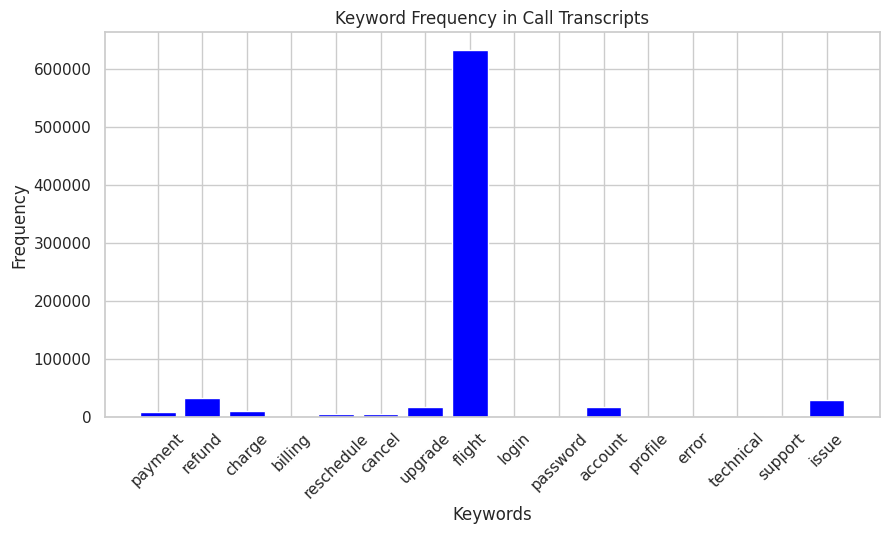

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# Load the CSV file to inspect its contents
file_path = "callsf0d4f5a.csv"
df = pd.read_csv(file_path)

# Convert datetime columns to actual datetime format for calculation
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'], errors='coerce')
df['call_end_datetime'] = pd.to_datetime(df['call_end_datetime'], errors='coerce')

# Sample a subset of call transcripts to analyze recurring issues
sample_transcripts = df["call_transcript"].sample(n=71810, random_state=42)

# Tokenize and clean text
all_text = " ".join(sample_transcripts).lower()
tokens = re.findall(r'\b[a-zA-Z0-9]+\b', all_text)

# Count occurrences of words
word_counts = Counter(tokens)
common_words = word_counts.most_common(70000)

# Define relevant keywords
words = ['payment', 'refund', 'charge', 'billing', 'reschedule', 'cancel', 'upgrade', 'flight', 'login', 'password', 'account', 'profile', 'error', 'technical', 'support', 'issue']

def count_given_words(words):
    word_freq = {word: 0 for word in words}
    for counter in common_words:
        if counter[0] in words:
            word_freq[counter[0]] = counter[1]
            print(f"{counter[0]}: {counter[1]}")
    return word_freq

# Count occurrences of selected keywords
word_frequencies = count_given_words(words)

# Plot word frequencies
plt.figure(figsize=(10, 5))
plt.bar(word_frequencies.keys(), word_frequencies.values(), color='blue')
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.title("Keyword Frequency in Call Transcripts")
plt.xticks(rotation=45)
plt.show()
